In [1]:
import numpy as np
import scipy.special
import matplotlib.pyplot as plt

In [8]:
class NerualNetwork:
    
    def __init__(self,inputNodes,hiddenNodes,outputNodes,learningRate):
        self.inodes = inputNodes
        self.hnodes = hiddenNodes
        self.onodes = outputNodes
        
        # activation function is the sigmoid function
     
        self.activation_function = lambda x: scipy.special.expit(x)
        
        self.whi = np.random.normal(0.0, pow(self.hnodes, -0.5), (self.hnodes, self.inodes)) #(numpy.random.rand(self.hnodes, self.inodes) - 0.5)
        self.ohw = np.random.normal(0.0, pow(self.onodes, -0.5), (self.onodes, self.hnodes)) #(numpy.random.rand(self.onodes, self.hnodes) - 0.5) 
        self.lr = learningRate
        

    def train(self,input_list,target_list):
        # convert inputs list to 2d array
        inputs = np.array(inputs_list, ndmin=2).T
        targets = np.array(target_list, ndmin=2).T
        
        print(inputs)
        # calculate signals into hidden layer
        hidden_inputs = np.dot(self.whi, inputs)
        # calculate the signals emerging from hidden layer
        hidden_outputs = self.activation_function(hidden_inputs)

        # calculate signals into final output layer
        final_inputs = np.dot(self.owh, hidden_outputs)
        # calculate the signals emerging from final output layer
        final_outputs = self.activation_function(final_inputs)

        output_errors = targets - final_outputs

    def query(self, inputs_list):
        # convert inputs list to 2d array
        inputs = np.array(inputs_list, ndmin=2).T
        
        print(inputs)
        # calculate signals into hidden layer
        hidden_inputs = np.dot(self.whi, inputs)
        # calculate the signals emerging from hidden layer
        hidden_outputs = self.activation_function(hidden_inputs)

        # calculate signals into final output layer
        final_inputs = np.dot(self.ohw, hidden_outputs)
        # calculate the signals emerging from final output layer
        final_outputs = self.activation_function(final_inputs)

        return final_outputs

In [9]:
inputNodes = 3
hiddenNodes = 3
outputNodes = 3

learningRate = 0.3

NN = NerualNetwork(inputNodes,hiddenNodes,outputNodes,learningRate)

In [10]:
print("Input Nodes: {} , Hidden Nodes: {}, Output Nodes: {} , Learning Rate: {} \n".format(NN.inodes,NN.hnodes,NN.onodes,NN.lr))
print("Input to Hidden Connection Matrix: \n {} \n\n Hidden to Output Connection Matrix: \n {}".format(NN.whi,NN.ohw))

Input Nodes: 3 , Hidden Nodes: 3, Output Nodes: 3 , Learning Rate: 0.3 

Input to Hidden Connection Matrix: 
 [[-0.57050122  0.88614993  0.67307877]
 [ 0.14175481 -0.31978651 -0.07001582]
 [-0.16722252 -0.26656252  0.1582957 ]] 

 Hidden to Output Connection Matrix: 
 [[ 0.96592323 -1.44126434 -0.08321655]
 [ 0.1149417   0.31496642 -0.17376773]
 [-0.55986573  0.64544392 -0.60280075]]


In [11]:
NN.query([1,2,3])

[[1]
 [2]
 [3]]


array([[0.60257187],
       [0.53428623],
       [0.35596936]])

In [22]:
data_file = open("/home/tomi/Data/howToMakeANN/mnist_train_100.csv",'r')
mnist_train_100 = data_file.readlines()
data_file.close()

In [23]:
len(mnist_train_100)

100

In [32]:
#Create the graph of the index from the dataset
def createGraph(index,image_array):
    all_nums = list()
    all_labels = list()
    all_labels = image_array[index][0]
    image_array = image_array[index].split(',')
    for i in image_array:
        all_nums.append(i)
    #print('label: {}'.format(all_labels[index]))
    #print('all_nums[{}] : {}'.format(index,all_nums[index]))
    #debugprint('type of all_nums[{}] : \n {}'.format(index,type(all_nums[index])))
    image_array = np.asfarray(all_nums[1:]).reshape((28,28))
    print("label: {}".format(all_labels[0]))
    #print(image_array) #debug
    plt.imshow(image_array,cmap='Greys',interpolation='None')
    

def createGraphNomalized(index,image_array, normalized_labels):
    print("label: {}".format(normalized_labels[index]))
    plt.imshow(image_array[index],cmap='Greys',interpolation='None')    

def normalizeData(data_list):
    scaled_input = [None] * len(data_list)
    scaled_input_labels = [None] * len(data_list)
    for x in range(len(data_list)):
        scaled_input[x] = list()
        for y in data_list[x]:
            #print("Data_list[{}] /n {}".format(x,data_list[x])) #debug
            all_values = data_list[x].split(',')
            scaled_input_labels[x] = all_values[0]
            scaled_input[x] = (np.asfarray(all_values[1:]).reshape((28,28)) / 255 * 0.99 ) +0.01 
            #print("scaled_input[{}] /n {}".format(x,scaled_input[x])) #debug
    return scaled_input, scaled_input_labels

label: 4


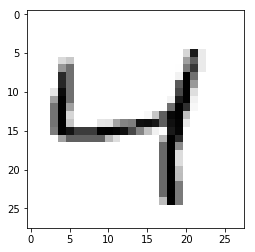

In [37]:
createGraph(2,mnist_train_100)

In [34]:
normalized,normalized_labels = normalizeData(mnist_train_100)

label: 4


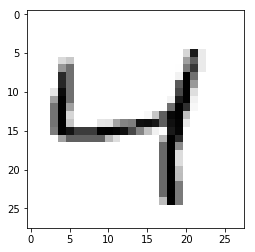

In [36]:
createGraphNomalized(2,normalized,normalized_labels)